# EGQuery
Muestra en qué bases de datos podemos encontrar información de nuestra búsqueda

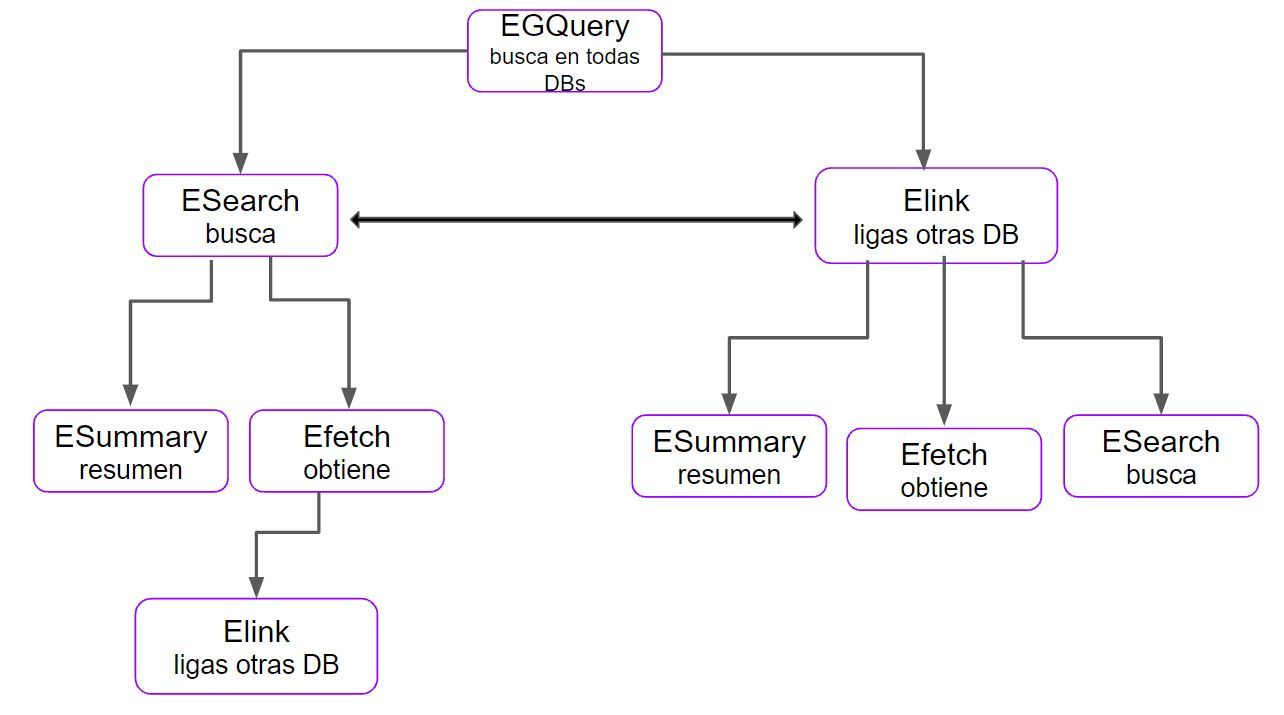

In [ ]:
from Bio import Entrez
Entrez.email = "mmayen@lcg.unam.mx"

#Buscando el mismo término del artículo de mosquitos
termino = "(Aedes[Title] OR Aedes[All Fields])AND((RNA-Seq[Title] OR transcriptomic[Title]) OR (transcriptome[Title] OR sequencing[Title]))"

#Buscamos el término en egquery
handle = Entrez.egquery(term=termino)
record = Entrez.read(handle)

#imprimimos las bases de datos que contienen información y el número de coincidencias
for row in record["eGQueryResult"]:
    print(row["DbName"], row["Count"])

##ESpell
Ayuda a corregir las búsquedas con sugerencias ortográficas


In [ ]:
handle = Entrez.espell(term="biopythooon")
record = Entrez.read(handle)

#El término que ingresamos
record["Query"] 
#El término corregido
record["CorrectedQuerry"]

## Esummary
Nos regresa un resumen de una lista de IDs

In [ ]:
#Taxonomy summary
handle = Entrez.esummary(db="taxonomy", id="9913,30521")
record = Entrez.read(handle)

#Nos dará 2 (de los 2 IDs ingresados)
len(record) 
#Nos dará las llaves del primer ID
record[0].keys() 
#Nos dará el Id del primer ID
record[0]["Id"]  

### Comprobando el tamaño de un archivo

In [ ]:
# Así podemos checar el peso de nuestros distintos request
import pickle
len(pickle.dumps(record)) #tamaño esummary

## Efetch
Entrez.efetch(base de datos, id, tipo, modo)

Regresa records en formato especificado (tipo y modo)

Ejemplo efetch:

Pediremos archivo genebank de nucleotide en texto de id "HE805982" con efetch. Después lo leeremos con SeqIO.read

In [ ]:
from Bio import Entrez, SeqIO  

handle = Entrez.efetch(db="nucleotide", id="HE805982", rettype="gb", retmode="text")
# leemos archivo genebank
record = SeqIO.read(handle, "genbank")

handle.close()

#Imprime el archivo
print(record)  
#Id de record obtenido
record.id
#Descripcion breve del record
record.description
#Regresa las anotaciones que contenga (diccionario)
record.annotations
#Regresa la secuencia
record.seq
 

## Guardar un archivo




In [ ]:
### creamos un archivo "HE805982.gb" ###
filename = "HE805982.gb"  
with Entrez.efetch(db="nucleotide",id="HE805982",rettype="gb", retmode="text") as file:
    with open(filename, "w") as handle:
        handle.write(file.read())  #escribimos archivo

# parseamos archivo con SeqIO, indiicamos que es tipo genbank
record = SeqIO.read("HE805982.gb", "genbank") 
record

## Efetch y archivos de texto
Hemos usado Entrez.read para manejar handles
Pero para obtener archivos tipo texto (fasta, abstracts...) debemos usar **handle.read**

In [ ]:
out_handle = open("files/prueba.fasta", "w")
fetch_handle = Entrez.efetch(db="nucleotide", id="1919569438, 1919569357, 1251949171",
                            rettype="fasta", retmode="text")
data = fetch_handle.read()  #usar handle.read()
fetch_handle.close() #cerrar handle
out_handle.write(data) #escribir archivo
out_handle.close() #cerrar archivo

## Ejercicio 2
Busqueda de linajes. Buscar qué tan emparentados están 2 organismos
Usar *Notoryctes thyplops* y *Chrysochloris asiatica*

Queremos saber de linajes -> base de datos=Taxonomy

* Búsqueda con esearch (con los nombres de los organismos) -> obtener IDs
*Usar IDs para obtener los archivos

In [ ]:
### Busqueda con esearch ###
handle = Entrez.esearch(db="Taxonomy", term="Notoryctes thyplops")
record = Entrez.read(handle)
#guardar IDs
id_taxo = record["IdList"] 

### efetch para obtener archivo de taxonomia ###
handle = Entrez.efetch(db="Taxonomy", id=id_taxo, retmode="xml")
Notoryctes = Entrez.read(handle)
#revisar la informacion que tenemos
Notoryctes[0].keys() 
print(Notoryctes[0]["Lineage"])  #Linaje


# Hacer lo mismo para Chrysochloris asiatica
handle = Entrez.esearch(db="Taxonomy", term="Chrysochloris asiatica")
record = Entrez.read(handle)
id_taxo = record["IdList"] 

handle = Entrez.efetch(db="Taxonomy", id=id_taxo, retmode="xml")
Chryso = Entrez.read(handle)

print(Chryso[0]["Lineage"])  #Linaje


### Comparación ### 
topo1 = Notoryctes[0]["Lineage"].split(";")
topo2 = Chryso[0]["Lineage"].split(";")

def comparar(org1,org2):
  for linaje1, linaje2 in zip(org1,org2):
    if linaje1 != linaje2:
      print("Organismo1:",linaje1,";","Organismo2:",linaje2)
      break
      
comparar(topo1,topo2)

## Elink

Permite buscar información en otras bases de datos (relacionada con la busqueda anterior)

* Cuando se buscan 2 ids o más no es recomendable juntarlos (no regresa los records en orden)

 Modificar URLs! (LinkSet)
 


In [ ]:
ids = "15718680"  #Id a buscar
# busqueda de ids de protein en otra base de datos (gene)
record = Entrez.read(Entrez.elink(dbfro='protein', id=ids,db='gene'))
pprint(record[0])  #Visualizar record

## Obtener citas
podmos obtener citas de artículos con su id de pubmed (pubmed central 'pmc')



In [ ]:
pmid = "32703847"  #id de pmc
# Busqueda de pmid en pubmed pmc
results = Entrez.read(Entrez.elink(dbfrom='pubmed',db='pmc',id=pmid))
pprint(results[0])  #Visualización

### BUSQUEDA DE Ids RELACIONADOS ###
pmid = "32703847"  #id de pmc
# Busqueda de citas (pmid) en pubmed pmc
results = Entrez.read(Entrez.elink(dbfrom='pubmed',db='pmc', LinkName='pubmed_pmc_refs', from_uid=pmid))
# Guardar links de pmc
pmc_ids = [link["Id"] for link in results[0]['LinkSetDb'][0]['Link']]
pmc_ids  #Visualización de IDs (de pubmed central)


## Epost
puede ayudar a que no se rompa una cadena muy larga (requests) (ej. búsqueda de urls) 

## Historial y WebEnv
podemos usarlos para búsquedas muy grandes

usehistory -> webenv

